In [1]:
import pandas as pd
import numpy as np

Ucitavanje baze, podela na trening, test i validacioni skup, skaliranje i primena PCA algoritma.

In [2]:
pd.set_option('display.max_columns', 600)

In [3]:
database = pd.read_csv('celaBazaPosleEpiMut.csv', sep=',', header=0)

In [4]:
database

Gene name variation  alpha-CH chemical shifts (Andersen et al., 1992) 1  \
0          MTOR    M1083V                                          14.742968    
1          MTOR    A1134V                                          -6.753854    
2          AKT1     V167A                                           4.318244    
3        MAP2K1     A366G                                          -8.043543    
4        MAP2K1     G392S                                          -9.852562    
...         ...       ...                                                ...    
95894     NT5C2     R195Q                                          -0.248485    
95895     NT5C2     G355E                                           9.329554    
95896     NT5C2      M53R                                           3.432416    
95897     NT5C2     G273W                                          -8.458504    
95898     NT5C2     S251R                                           2.116767    

       Hydrophobicity index (Argos et al., 1982) 1  \
0                                       -33.311483   
1                                       -54.468830   
2                                        27.903090   
3                                         9.511877   
4                                         1.481990   
...                                            ...   
95894                                   -45.966315   
95895                                   -32.979865   
95896                                    16.042263   
95897                                   194.497802   
95898                                   -45.342221   

       Signal sequence helical potential (Argos et al., 1982) 1  \
0                                             591.554818          
1                                             -23.158126          
2                                              -5.784182          
3                                              65.541026          
4                                              24.888312          
...                                                  ...          
95894                                          54.832550          
95895                                          44.546857          
95896                                          75.554689          
95897                                          30.518072          
95898                                          89.195976          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
0                                             605.156577              
1                                             -92.762155              
2                                             -20.847024              
3                                              83.522085              
4                                               8.298248              
...                                                  ...              
95894                                          -4.802087              
95895                                          -3.918395              
95896                                         169.641178              
95897                                         -38.450264              
95898                                          32.758690              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
0                                               5.875901                
1                                               9.222564                
2                                               5.140362                
3                                              -6.650271                
4                                               0.000000                
...                                                  ...                
95894                                          -0.936179                
95895                                           8.448055                
95896                                          -7.590063             

In [5]:
database.describe()

alpha-CH chemical shifts (Andersen et al., 1992) 1  \
count                                       95899.000000    
mean                                            0.698141    
std                                            15.617005    
min                                          -225.515870    
25%                                            -3.979647    
50%                                             0.000000    
75%                                             5.271487    
max                                           233.716377    

       Hydrophobicity index (Argos et al., 1982) 1  \
count                                 95899.000000   
mean                                      7.893816   
std                                     151.795453   
min                                   -1405.775472   
25%                                     -52.398052   
50%                                       0.916813   
75%                                      65.737574   
max                                    1819.713963   

       Signal sequence helical potential (Argos et al., 1982) 1  \
count                                       95899.000000          
mean                                            6.919372          
std                                           180.022927          
min                                         -1507.604710          
25%                                           -44.257530          
50%                                             2.377047          
75%                                            56.295043          
max                                          1406.144672          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
count                                       95899.000000              
mean                                            5.546603              
std                                           151.454028              
min                                         -1166.625173              
25%                                           -38.164651              
50%                                             1.892493              
75%                                            48.797549              
max                                          1226.635452              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000                
mean                                            1.763952                
std                                            24.452448                
min                                          -219.961016                
25%                                            -6.783583                
50%                                             0.228709                
75%                                             9.409683                
max                                           219.450784                

       Conformational parameter of beta-structure (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000                   
mean                                            0.288530                   
std                                             6.135673                   
min                                           -56.158758                   
25%                                            -1.625076                   
50%                                             0.000000                   
75%                                             2.197984                   
max                                            58.191687                   

       Conformational parameter of beta-turn (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000              
mean                                            0.699405              
std                                            11.303624              
min                                           -92.207657              
25%                         

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
y = database['Class']
X = database.drop(columns=['Class', 'variation', 'Gene name'])

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=7, stratify=y_train_val)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=300)

In [11]:
pca.fit(X_train, y_train)

PCA(n_components=300)

In [12]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

Procenat sacuvanih informacija.

In [13]:
sum(pca.explained_variance_ratio_)

0.9167903978041609

In [13]:
import imblearn

Using TensorFlow backend.


In [15]:
np.bincount(y_train)

array([ 2136, 59239])

In [17]:
np.bincount(y_train_resampled_ensem)

array([ 5923, 59239])

In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
from tensorflow import keras

Formiranje modela. Svi modeli su prvobitno ispitani preko validacionog skupa radi ispitivanja parametara.

Formiranje modela nad nebalansiranim podacima.

In [227]:
output_bias= np.log([len(y_train[y_train==1])/len(y_train[y_train==0])])

In [228]:
output_bias

array([3.32264519])

In [229]:
output_bias = tf.keras.initializers.Constant(output_bias)

In [17]:
metrike = [tf.keras.metrics.TrueNegatives(name='tn'),
           tf.keras.metrics.AUC(name='roc'),
           tf.keras.metrics.AUC(name='prc', curve='PR'),
           tf.keras.metrics.BinaryAccuracy(name='acc')
]

In [18]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
import tensorflow_addons as tfa

In [19]:
from matplotlib import pyplot as plt

In [20]:
from sklearn import metrics

In [21]:
import seaborn as sns

Funkcija koja formira neuronsku mrezu koja se koristi u ansamblu.

In [22]:
def ann_model():
    model = Sequential()
    model.add(Dense(20, input_dim=300, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=metrike)
    return model

Formiranje ansambla potpuno povezanih neuronskih mreža.

In [23]:
def ensembleFuncTrain(X_train_one, X_train_zero):
    #Formiranje modela
    lenZero = len(X_train_zero)
    n = int(len(X_train_one)/lenZero)
    print(n)
    models = []
    for i in range(0, n):
        modelLoop = ann_model()
        if i!=(n-1):
            dataXy = pd.concat([X_train_one[i*lenZero:(i+1)*lenZero], X_train_zero])
            classData = dataXy['Class']
            modelLoop.fit(dataXy.drop(columns=['Class']), classData, epochs=30, batch_size=64)
        else:
            dataXy = pd.concat([X_train_one[i*lenZero:], X_train_zero])
            classData = dataXy['Class']
            modelLoop.fit(dataXy.drop(columns=['Class']), classData, epochs=30, batch_size=64)
        models.append(modelLoop)
    return models

Izracunavanje predikcija za svaku instancu prosledjenog skupa.

In [24]:
#Formiranje niza predikcija za validacioni skup
def ensembleFuncPred(models, X):
    pred_prob = []
    n = len(models)
    for j in range(0, len(X)):
        voting = []
        for i in range(0,len(models)):
            pred = models[i].predict(X[j].reshape(1,-1))
            pred = (pred > 0.5)
            voting.append(pred)
        pred_prob.append(float(sum(voting)/n))
    return pred_prob

Metoda koja umanjuje broj instanci većinske, štetne klase za prosleđeni procenat.

In [25]:
from math import sqrt
def CCMUT(X,f):
    cluster_centroid = np.sum(X,axis=0)/X.shape[0]
    euclidean = [None]*X.shape[0]
    for i in range(0,X.shape[0]):
        euclidean[i] = sqrt(sum((cluster_centroid-X[i])**2))
    indices = list(reversed(sorted(range(len(euclidean)), key = lambda j: euclidean[j])))
    X_f = np.delete(X, indices[:int(f/100*X.shape[0])], axis=0)
    return X_f

Primena CCMUT-a.

In [26]:
X_trainP = pd.DataFrame(X_train_pca)
X_trainP.insert(len(X_trainP.columns), "Class", y_train.values, True)
X_train_one = X_trainP[X_trainP['Class'] == 1.0]
X_train_one = X_train_one.reset_index(drop=True)
X_train_zero = X_trainP[X_trainP['Class'] == 0.0]
X_train_ccmut_one = CCMUT(X_train_one.values, 5)
X_train_ccmut_one_frame = pd.DataFrame(X_train_ccmut_one, columns=X_train_zero.columns)
X_train_all = pd.concat([X_train_ccmut_one_frame, X_train_zero])
y_trainCCMUT = X_train_all['Class']
X_trainCCMUT = X_train_all.drop(columns=['Class'])

Uvećavanje broja neutralnih instanci.

In [27]:
osEn = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.1)
X_train_resampled_ensem, y_train_resampled_ensem = osEn.fit_resample(X_trainCCMUT, y_trainCCMUT)

Podela trening podataka na neutralne i štetne koji se prosleđuju funkciji za formiranje asembla.

In [28]:
X_trainEn = pd.DataFrame(X_train_resampled_ensem)
X_trainEn.insert(len(X_trainEn.columns), "Class", y_train_resampled_ensem.values, True)
X_trainEn_one = X_trainEn[X_trainEn['Class'] == 1.0]
X_trainEn_zero = X_trainEn[X_trainEn['Class'] == 0.0]

In [29]:
y_val = y_val.reset_index(drop=True)

In [30]:
from sklearn.utils import shuffle

Mešanje štetnih instanci trening skupa da bi svaki model dobio slučajan skup instanci.

In [31]:
X_shuffled_train_one = shuffle(X_trainEn_one,random_state=0)

Formiranje ansambla.

In [32]:
modelsE = ensembleFuncTrain(X_shuffled_train_one, X_trainEn_zero)

10
Epoch 1/30
176/176 [==============================] - 2s 2ms/step - loss: 0.7453 - tn: 2016.0000 - roc: 0.5037 - prc: 0.5000 - acc: 0.4972
Epoch 2/30
176/176 [==============================] - 0s 2ms/step - loss: 0.7193 - tn: 2597.0000 - roc: 0.5248 - prc: 0.5191 - acc: 0.5167
Epoch 3/30
176/176 [==============================] - 0s 2ms/step - loss: 0.7033 - tn: 2847.0000 - roc: 0.5456 - prc: 0.5383 - acc: 0.5294
Epoch 4/30
176/176 [==============================] - 0s 2ms/step - loss: 0.6915 - tn: 2969.0000 - roc: 0.5655 - prc: 0.5580 - acc: 0.5407
Epoch 5/30
176/176 [==============================] - 0s 2ms/step - loss: 0.6822 - tn: 3074.0000 - roc: 0.5848 - prc: 0.5779 - acc: 0.5545
Epoch 6/30
176/176 [==============================] - 0s 2ms/step - loss: 0.6744 - tn: 3136.0000 - roc: 0.6029 - prc: 0.5971 - acc: 0.5657
Epoch 7/30
176/176 [==============================] - 0s 2ms/step - loss: 0.6677 - tn: 3268.0000 - roc: 0.6199 - prc: 0.6146 - acc: 0.5805
Epoch 8/30
176/176 [====

176/176 [==============================] - 0s 2ms/step - loss: 0.5866 - tn: 3695.0000 - roc: 0.7817 - prc: 0.7864 - acc: 0.7012
Epoch 28/30
176/176 [==============================] - 0s 2ms/step - loss: 0.5815 - tn: 3716.0000 - roc: 0.7870 - prc: 0.7917 - acc: 0.7038
Epoch 29/30
176/176 [==============================] - 0s 2ms/step - loss: 0.5764 - tn: 3716.0000 - roc: 0.7925 - prc: 0.7972 - acc: 0.7078
Epoch 30/30
176/176 [==============================] - 0s 2ms/step - loss: 0.5712 - tn: 3752.0000 - roc: 0.7980 - prc: 0.8028 - acc: 0.7118
Epoch 1/30
176/176 [==============================] - 2s 2ms/step - loss: 0.7613 - tn: 6399.0000 - roc: 0.6498 - prc: 0.6337 - acc: 0.6033
Epoch 2/30
176/176 [==============================] - 0s 2ms/step - loss: 0.7317 - tn: 2651.0000 - roc: 0.5146 - prc: 0.5144 - acc: 0.5013
Epoch 3/30
176/176 [==============================] - 0s 2ms/step - loss: 0.7131 - tn: 2658.0000 - roc: 0.5297 - prc: 0.5303 - acc: 0.5111
Epoch 4/30
176/176 [===============

176/176 [==============================] - 0s 2ms/step - loss: 0.5846 - tn: 4031.0000 - roc: 0.7804 - prc: 0.7909 - acc: 0.7029
Epoch 24/30
176/176 [==============================] - 0s 2ms/step - loss: 0.5791 - tn: 4017.0000 - roc: 0.7878 - prc: 0.7982 - acc: 0.7102
Epoch 25/30
176/176 [==============================] - 0s 2ms/step - loss: 0.5735 - tn: 4119.0000 - roc: 0.7936 - prc: 0.8043 - acc: 0.7154
Epoch 26/30
176/176 [==============================] - 0s 2ms/step - loss: 0.5679 - tn: 4097.0000 - roc: 0.8003 - prc: 0.8108 - acc: 0.7201
Epoch 27/30
176/176 [==============================] - 0s 2ms/step - loss: 0.5622 - tn: 4150.0000 - roc: 0.8059 - prc: 0.8169 - acc: 0.7242
Epoch 28/30
176/176 [==============================] - 0s 2ms/step - loss: 0.5566 - tn: 4160.0000 - roc: 0.8121 - prc: 0.8227 - acc: 0.7279
Epoch 29/30
176/176 [==============================] - 0s 2ms/step - loss: 0.5511 - tn: 4197.0000 - roc: 0.8170 - prc: 0.8276 - acc: 0.7329
Epoch 30/30
176/176 [===========

Predikcije instanci validacionog skupa.

In [33]:
predProbVal = ensembleFuncPred(modelsE, X_val_pca)

In [34]:
predProbVal2 = [1.0 if e > 0.5 else 0.0 for e in predProbVal]

In [35]:
metrics.accuracy_score(y_val, predProbVal2)

0.6448774765380605

In [36]:
metrics.recall_score(y_val, predProbVal2)

0.6536799459824443

In [37]:
metrics.precision_score(y_val, predProbVal2)

0.968003199680032

In [38]:
metrics.roc_auc_score(y_val, predProbVal2)

0.5272145048264281

In [39]:
metrics.f1_score(y_val, predProbVal2)

0.7803796703075249

In [40]:
metrics.confusion_matrix(y_val, predProbVal2)

array([[ 214,  320],
       [5129, 9681]])

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

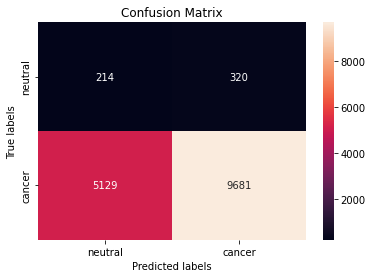

In [41]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_val, predProbVal2), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Izrada ROC krive.

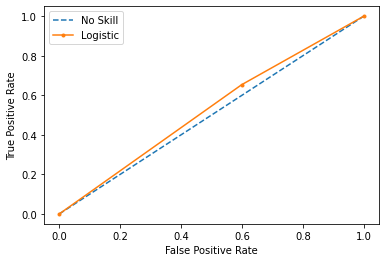

In [42]:
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = metrics.roc_curve(y_val, predProbVal2)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Izrada precision-recall krive.

Logistic: f1=0.780 auc=0.972


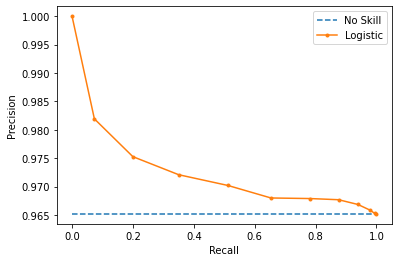

In [43]:
lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_val, predProbVal)
lr_f1, lr_auc = metrics.f1_score(y_val, predProbVal2), metrics.auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Funkcija za izračunavanje predikcija instanci trening skupa.

In [58]:
pred_probTrain = ensembleFuncPred(modelsE, X_train_pca)

In [43]:
pred_probTrain2 = [1.0 if e > 0.5 else 0.0 for e in pred_probTrain]

In [44]:
metrics.balanced_accuracy_score(y_train, pred_probTrain2)

0.6995862685801495

In [45]:
metrics.confusion_matrix(y_train, pred_probTrain2)

array([[ 1597,   539],
       [20644, 38595]])

Funkcija za izračunavanje predikcija instanci trening skupa.

In [44]:
y_test2 = y_test.reset_index(drop=True)

In [45]:
pred_probTest = ensembleFuncPred(modelsE, X_test_pca)

In [47]:
pred_probTest2 = [1.0 if e > 0.5 else 0.0 for e in pred_probTest]

In [48]:
metrics.accuracy_score(y_test, pred_probTest2)

0.6504171011470281

In [49]:
metrics.recall_score(y_test, pred_probTest2)

0.6598962834917891

In [50]:
metrics.precision_score(y_test, pred_probTest2)

0.9676039603960396

In [51]:
metrics.roc_auc_score(y_test, pred_probTest2)

0.5238104171949963

In [52]:
metrics.confusion_matrix(y_test, pred_probTest2)

array([[  259,   409],
       [ 6296, 12216]])

In [53]:
metrics.balanced_accuracy_score(y_test, pred_probTest2)

0.5238104171949963

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

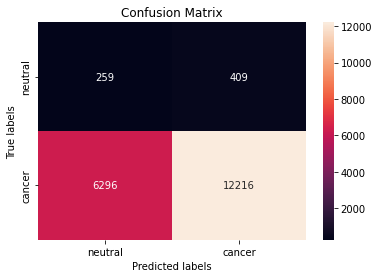

In [54]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, pred_probTest2), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

ROC kriva nad test podacima.

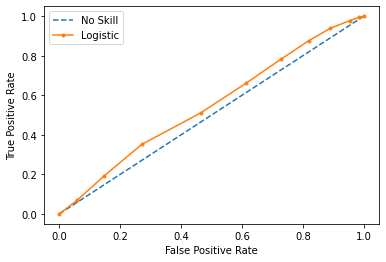

In [55]:
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = metrics.roc_curve(y_test, pred_probTest)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.785 auc=0.978


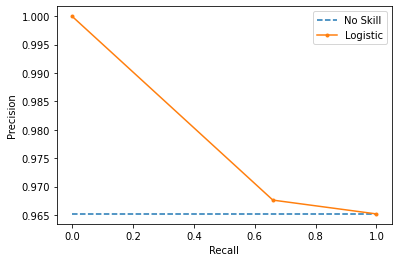

In [56]:
lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, pred_probTest2)
lr_f1, lr_auc = metrics.f1_score(y_test, pred_probTest2), metrics.auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Ovaj model daje najbolje rezultate svih mera kvaliteta nad test skupom.

In [57]:
print(metrics.classification_report(y_test, pred_probTest2))

              precision    recall  f1-score   support

         0.0       0.04      0.39      0.07       668
         1.0       0.97      0.66      0.78     18512

    accuracy                           0.65     19180
   macro avg       0.50      0.52      0.43     19180
weighted avg       0.94      0.65      0.76     19180



Proces formiranja finalnog skup modela, odnosno ansambla, sa svim izabranim parametrima i podacima iz baze.

In [31]:
y_final = database['Class']
X_final = database.drop(columns=['Class', 'variation', 'Gene name'])

In [32]:
scaler = StandardScaler()
scaler.fit(X_final)
X_final = scaler.transform(X_final)

In [33]:
pca = PCA(n_components=300)

In [34]:
pca.fit(X_final, y_final)

PCA(n_components=300)

In [35]:
X_final_pca = pca.transform(X_final)

In [36]:
X_trainF = pd.DataFrame(X_final_pca)
X_trainF.insert(len(X_trainF.columns), "Class", y_final.values, True)
X_train_oneF = X_trainF[X_trainF['Class'] == 1.0]
X_train_oneF = X_train_oneF.reset_index(drop=True)
X_train_zeroF = X_trainF[X_trainF['Class'] == 0.0]
X_train_ccmut_oneF = CCMUT(X_train_oneF.values, 5)
X_train_ccmut_one_frameF = pd.DataFrame(X_train_ccmut_oneF, columns=X_train_zeroF.columns)
X_train_allF = pd.concat([X_train_ccmut_one_frameF, X_train_zeroF])
y_trainCCMUT_F = X_train_allF['Class']
X_trainCCMUT_F = X_train_allF.drop(columns=['Class'])

In [37]:
osEnFin = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.1)
X_final_resampled_ensem, y_final_resampled_ensem = osEnFin.fit_resample(X_trainCCMUT_F, y_trainCCMUT_F)

In [38]:
X_finalEn = pd.DataFrame(X_final_resampled_ensem)
X_finalEn.insert(len(X_finalEn.columns), "Class", y_final_resampled_ensem.values, True)
X_finalEn_one = X_finalEn[X_finalEn['Class'] == 1.0]
X_finalEn_zero = X_finalEn[X_finalEn['Class'] == 0.0]

In [39]:
X_shuffled_finalEn_one = shuffle(X_finalEn_one,random_state=0)

In [41]:
finalEnsemblerModels = ensembleFuncTrain(X_shuffled_finalEn_one, X_finalEn_zero)

10
Epoch 1/30
275/275 [==============================] - 2s 2ms/step - loss: 0.8104 - tn: 2256.0000 - roc: 0.5033 - prc: 0.4983 - acc: 0.5002
Epoch 2/30
275/275 [==============================] - 1s 2ms/step - loss: 0.7445 - tn: 3513.0000 - roc: 0.5212 - prc: 0.5179 - acc: 0.5108
Epoch 3/30
275/275 [==============================] - 1s 2ms/step - loss: 0.7154 - tn: 4322.0000 - roc: 0.5406 - prc: 0.5387 - acc: 0.5291
Epoch 4/30
275/275 [==============================] - 1s 2ms/step - loss: 0.6976 - tn: 4765.0000 - roc: 0.5629 - prc: 0.5617 - acc: 0.5441
Epoch 5/30
275/275 [==============================] - 1s 2ms/step - loss: 0.6851 - tn: 5009.0000 - roc: 0.5843 - prc: 0.5840 - acc: 0.5587
Epoch 6/30
275/275 [==============================] - 1s 2ms/step - loss: 0.6754 - tn: 5254.0000 - roc: 0.6037 - prc: 0.6044 - acc: 0.5727
Epoch 7/30
275/275 [==============================] - 1s 2ms/step - loss: 0.6673 - tn: 5427.0000 - roc: 0.6211 - prc: 0.6237 - acc: 0.5869
Epoch 8/30
275/275 [====

275/275 [==============================] - 1s 2ms/step - loss: 0.5625 - tn: 6513.0000 - roc: 0.7992 - prc: 0.8040 - acc: 0.7178
Epoch 28/30
275/275 [==============================] - 1s 2ms/step - loss: 0.5576 - tn: 6538.0000 - roc: 0.8044 - prc: 0.8092 - acc: 0.7229
Epoch 29/30
275/275 [==============================] - 1s 2ms/step - loss: 0.5529 - tn: 6598.0000 - roc: 0.8082 - prc: 0.8132 - acc: 0.7257
Epoch 30/30
275/275 [==============================] - 1s 2ms/step - loss: 0.5482 - tn: 6632.0000 - roc: 0.8130 - prc: 0.8178 - acc: 0.7315
Epoch 1/30
275/275 [==============================] - 2s 2ms/step - loss: 0.7384 - tn: 9212.0000 - roc: 0.6756 - prc: 0.6578 - acc: 0.6185
Epoch 2/30
275/275 [==============================] - 1s 2ms/step - loss: 0.7093 - tn: 3972.0000 - roc: 0.5244 - prc: 0.5174 - acc: 0.5161
Epoch 3/30
275/275 [==============================] - 1s 2ms/step - loss: 0.6957 - tn: 4654.0000 - roc: 0.5462 - prc: 0.5401 - acc: 0.5320
Epoch 4/30
275/275 [===============

275/275 [==============================] - 1s 2ms/step - loss: 0.5895 - tn: 6292.0000 - roc: 0.7656 - prc: 0.7752 - acc: 0.6911
Epoch 24/30
275/275 [==============================] - 1s 2ms/step - loss: 0.5842 - tn: 6325.0000 - roc: 0.7716 - prc: 0.7815 - acc: 0.6945
Epoch 25/30
275/275 [==============================] - 1s 2ms/step - loss: 0.5792 - tn: 6402.0000 - roc: 0.7771 - prc: 0.7868 - acc: 0.7002
Epoch 26/30
275/275 [==============================] - 1s 2ms/step - loss: 0.5741 - tn: 6460.0000 - roc: 0.7829 - prc: 0.7925 - acc: 0.7064
Epoch 27/30
275/275 [==============================] - 1s 2ms/step - loss: 0.5690 - tn: 6474.0000 - roc: 0.7883 - prc: 0.7983 - acc: 0.7103
Epoch 28/30
275/275 [==============================] - 1s 2ms/step - loss: 0.5640 - tn: 6538.0000 - roc: 0.7933 - prc: 0.8030 - acc: 0.7151
Epoch 29/30
275/275 [==============================] - 1s 2ms/step - loss: 0.5589 - tn: 6620.0000 - roc: 0.7982 - prc: 0.8081 - acc: 0.7205
Epoch 30/30
275/275 [===========

Čuvanje modela.

In [42]:
for index, model in enumerate(finalEnsemblerModels):
    model.save('EnsembleNeuralNetworkModels/' + str(index))

INFO:tensorflow:Assets written to: EnsembleNeuralNetworkModels/0/assets
INFO:tensorflow:Assets written to: EnsembleNeuralNetworkModels/1/assets
INFO:tensorflow:Assets written to: EnsembleNeuralNetworkModels/2/assets
INFO:tensorflow:Assets written to: EnsembleNeuralNetworkModels/3/assets
INFO:tensorflow:Assets written to: EnsembleNeuralNetworkModels/4/assets
INFO:tensorflow:Assets written to: EnsembleNeuralNetworkModels/5/assets
INFO:tensorflow:Assets written to: EnsembleNeuralNetworkModels/6/assets
INFO:tensorflow:Assets written to: EnsembleNeuralNetworkModels/7/assets
INFO:tensorflow:Assets written to: EnsembleNeuralNetworkModels/8/assets
INFO:tensorflow:Assets written to: EnsembleNeuralNetworkModels/9/assets


In [31]:
from pickle import dump

In [32]:
dump(scaler, open('scaler.pkl', 'wb'))

In [33]:
dump(pca, open('pca.pkl', 'wb'))